 Competition : **New York City Taxi Fare Prediction** (https://www.kaggle.com/c/new-york-city-taxi-fare-prediction            

* Predict a rider's taxi fare

In [1048]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

* Load the dataset and set number of rows as nrows =3900000

In [1049]:
data=pd.read_csv("D:/train.csv",nrows = 39000)
data.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [1050]:
#remove key column
cols = ['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
data=pd.read_csv("D:/train.csv",nrows = 39000,usecols=cols)
print(data.columns)
print(data.shape)

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')
(39000, 7)



**Data Wrangling**
* Identify and handle missing values
    -replace it with its mean 
    -drop the rows/columns having missing values
* Find outliers
* data formating (Incorrect datatype)
* Fetaure Scaling/Normlization

In [1051]:
data.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [1052]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000,39000.000000
mean,11.352627,-72.511977,39.933840,-72.500111,39.920758,1.663615
std,9.645575,10.398607,6.327415,10.435640,6.071322,1.284639
min,-3.000000,-75.414728,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992060,40.734798,-73.991171,40.734316,1.000000
50%,8.500000,-73.981746,40.752685,-73.980198,40.753326,1.000000
75%,12.500000,-73.967082,40.767325,-73.963766,40.768141,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


**fare amount column :-**
Found negative value of fare amount. Fare never be negative let's drop those rows which are having negative fare amount and also remove outliers

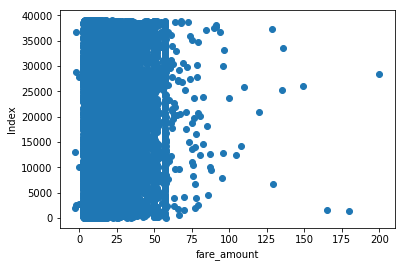

In [1053]:
plt.scatter(x=data.fare_amount,y=data.index)
plt.ylabel('Index')
plt.xlabel('fare_amount')
plt.show()

In [1054]:
data['fare_amount'][(data.fare_amount<0) | (data.fare_amount>=300)].count()

5

In [1055]:
data.shape

(39000, 7)

In [1056]:
data=data.drop(data[(data.fare_amount<0) | (data.fare_amount>=300)].index,axis=0)

In [1057]:
data.fare_amount.isnull().sum()

0

In [1058]:
data.shape

(38995, 7)

data with negative fare_amount has been removed



================================================

-find NaN values in given dataset and fill/replace it

In [1059]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


**longitude and latitude **

found NaN values in columns dropoff_longitude and dropoff_latitude     
We found NaN values in columns i) dropoff_longitude and ii) dropoff_latitude  which is not much as comapared to our dataset. So we will replace it by mean values

**Changed the idea **

In [1060]:
print(data.pickup_latitude.head(5))
print(data.dropoff_latitude.head(5))

0    40.721319
1    40.711303
2    40.761270
3    40.733143
4    40.768008
Name: pickup_latitude, dtype: float64
0    40.712278
1    40.782004
2    40.750562
3    40.758092
4    40.783762
Name: dropoff_latitude, dtype: float64


-------------------------------
Check test data latitude and longitude range for New your City (40° 42' 51" N / 74° 0' 23" W)

In [1061]:
test_data=pd.read_csv('D:/test1.csv')
test_data.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,08:24.0,2015-01-27 13:08:24 UTC,-73.983123,40.725289,-73.981430,40.743835,1
1,08:24.0,2015-01-27 13:08:24 UTC,-73.789804,40.645352,-73.998886,40.739201,1
2,12:12.0,2011-10-08 11:53:44 UTC,-73.138071,41.365669,-73.979654,40.746139,1
3,12:12.0,2012-12-01 21:12:12 UTC,-73.973311,40.750564,-73.990448,40.751635,1
4,12:12.0,2012-12-01 21:12:12 UTC,-73.874097,40.773698,-73.988565,40.744427,1


In [1062]:
test_data.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

longitude  max and min (test data)

In [1063]:
lon_min=min(test_data.pickup_longitude.min(),test_data.dropoff_longitude.min())
lon_max=max(test_data.pickup_longitude.max(),test_data.dropoff_longitude.max())
print(lon_min,',',lon_max)

-74.18677312 , -73.13807055


latitude max and min (test data)

In [1064]:
lat_min=min(test_data.pickup_latitude.min(),test_data.dropoff_latitude.min())
lat_max=max(test_data.pickup_latitude.max(),test_data.dropoff_latitude.max())
print(lat_min,',',lat_max)

40.60521189 , 41.52379017


--------------------------------------------

Apply the same range on train data and drop remaining 

**#pickup_latitude** & **dropoff_latitude** must be between lat_max and lat_min

In [1065]:
data[(data.pickup_latitude< lat_min) | (data.pickup_latitude>lat_max) ]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,5.50,2012-12-24 11:24:00 UTC,0.000000,0.000000,0.000000,0.000000,3
15,5.00,2013-11-23 12:57:00 UTC,0.000000,0.000000,0.000000,0.000000,1
26,6.50,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1
124,8.00,2013-01-17 17:22:00 UTC,0.000000,0.000000,0.000000,0.000000,2
192,3.70,2010-09-05 17:08:00 UTC,0.000000,0.000000,0.000000,0.000000,5
233,8.50,2011-07-24 01:14:35 UTC,0.000000,0.000000,0.000000,0.000000,2
273,8.10,2009-10-30 18:13:00 UTC,0.000000,0.000000,0.000000,0.000000,4
357,8.50,2013-07-04 16:41:27 UTC,0.000000,0.000000,0.000000,0.000000,1
376,2.50,2014-05-29 05:57:22 UTC,0.000000,0.000000,0.000000,0.000000,1
387,13.00,2012-11-15 08:39:00 UTC,0.000000,0.000000,0.000000,0.000000,1


In [1066]:
data.drop(data[(data.pickup_latitude< lat_min) | (data.pickup_latitude>lat_max)].index,axis=0,inplace=True)

In [1067]:
data[(data.dropoff_latitude< lat_min) | (data.dropoff_latitude>lat_max)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1260,5.70,2011-03-10 20:25:00 UTC,-73.973907,40.754743,0.000000,0.000000,2
2283,45.00,2013-03-05 23:35:49 UTC,-73.786815,40.641398,-73.968542,40.577815,2
4278,7.00,2015-04-07 23:33:02 UTC,-73.972702,40.757423,0.000000,0.000000,1
4291,45.00,2012-05-07 15:49:00 UTC,-74.031268,40.703843,-73.969337,40.551710,1
4567,10.10,2010-01-07 11:52:00 UTC,-73.989795,40.715727,-73.996540,40.484335,1
5044,52.90,2011-10-20 19:51:55 UTC,-73.982771,40.761852,-73.962296,40.590033,1
5795,37.50,2013-02-23 12:16:48 UTC,-73.776708,40.645295,-73.937149,40.590188,2
6384,33.70,2011-05-31 00:12:20 UTC,-73.988617,40.731455,-73.998338,40.597675,1
6971,58.00,2014-10-18 08:38:00 UTC,-73.946860,40.780910,-73.900825,40.590317,1
7014,4.50,2011-06-18 04:03:00 UTC,-73.988980,40.721697,-74.001073,0.728087,3


In [1068]:

data.drop(data[(data.dropoff_latitude<lat_min) | (data.dropoff_latitude>lat_max)].index,axis=0,inplace=True)

**pickup_longitude and dropoff_longitude must be between lon_min and lon_max

In [1069]:
print(data.pickup_longitude.tail(5))
print(data.dropoff_longitude.tail(5))

38995   -73.952275
38996   -73.978608
38997   -73.971372
38998   -73.979176
38999   -73.982186
Name: pickup_longitude, dtype: float64
38995   -73.968233
38996   -73.971508
38997   -73.958416
38998   -73.965011
38999   -73.970512
Name: dropoff_longitude, dtype: float64


In [1070]:
data.pickup_longitude.abs().head()

0    73.844311
1    74.016048
2    73.982738
3    73.987130
4    73.968095
Name: pickup_longitude, dtype: float64

In [1071]:
data[(data.pickup_longitude<lon_min) | (data.pickup_longitude>lon_max)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
649,66.30,2009-09-19 10:34:41 UTC,-74.438233,40.993260,-74.185996,40.693874,2
1684,2.50,2009-05-02 19:01:01 UTC,-73.137393,41.366138,-73.996510,40.745320,2
3075,6.90,2009-01-06 10:53:36 UTC,-73.137393,41.366138,-73.974598,40.751311,1
4487,4.90,2009-08-26 07:43:16 UTC,-73.137393,41.366138,-73.957685,40.765644,1
5648,7.70,2010-04-28 19:06:13 UTC,-73.137393,41.366138,-73.137393,41.366138,1
5663,49.15,2009-02-25 07:05:05 UTC,-73.137393,41.366138,-74.000940,40.731723,1
6416,6.10,2010-05-28 19:26:49 UTC,-73.137393,41.366138,-73.137393,41.366138,1
7043,3.30,2009-05-06 10:22:30 UTC,-73.137393,41.366138,-73.137393,41.366138,1
9808,6.90,2009-08-13 23:15:28 UTC,-73.137393,41.366138,-73.952331,40.786380,1
10688,4.50,2009-08-04 14:51:10 UTC,-73.137393,41.366138,-73.137393,41.366138,1


In [1072]:
data.drop(data[(data.pickup_longitude<lon_min) | (data.pickup_longitude>lon_max)].index,axis=0,inplace=True)

In [1073]:
# dropoff
data[(data.dropoff_longitude<lon_min) | (data.dropoff_longitude>lon_max)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2280,8.9,2011-08-29 08:24:00 UTC,-73.936667,40.757815,0.000000,40.757815,1
5864,8.5,2012-03-04 01:35:00 UTC,-73.995030,40.744945,-7.986640,40.729937,1
7401,4.5,2009-07-16 09:41:26 UTC,-73.900571,40.764047,-73.137393,41.366138,1
9899,7.7,2009-08-12 19:04:53 UTC,-73.974361,40.755168,-73.137393,41.366138,1
15749,10.9,2012-05-12 17:58:00 UTC,-73.967183,40.772403,0.000000,40.740677,1
21186,61.9,2009-07-24 17:51:29 UTC,-73.966378,40.757823,-74.217028,40.647827,1
24958,10.9,2012-01-02 18:32:00 UTC,-73.991677,40.735017,-3.959442,40.769480,1
27778,61.5,2009-05-12 21:24:00 UTC,-73.976852,40.750055,-74.187173,40.690030,5
34448,11.7,2012-03-18 21:23:00 UTC,-73.993487,40.757247,-0.116667,40.719212,2
36910,6.1,2012-03-15 16:56:00 UTC,-73.977862,40.773735,-0.116667,40.765042,2


In [1074]:
data.drop(data[(data.dropoff_longitude<lon_min) | (data.dropoff_longitude>lon_max)].index,axis=0,inplace=True)


let's see NaN Values now from both dropoff_longitude and dropoff_latitude .

In [1075]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [1076]:
data[data.dropoff_longitude.isnull()==True].head(1)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [1077]:
data.drop(data[data.dropoff_longitude.isnull()==True].index,axis=0,inplace=True)

In [1078]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

**passenger_count** column

In [1079]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000,38109.000000
mean,11.313958,-73.975377,40.751027,-73.974159,40.751536,1.665381
std,9.511404,0.034792,0.027131,0.035011,0.030908,1.285715
min,0.000000,-74.181602,40.614803,-74.186090,40.605535,0.000000
25%,6.000000,-73.992293,40.736564,-73.991362,40.735913,1.000000
50%,8.500000,-73.982060,40.753462,-73.980629,40.754093,1.000000
75%,12.500000,-73.968355,40.767747,-73.965588,40.768465,2.000000
max,200.000000,-73.416169,41.391042,-73.416169,41.391042,6.000000



Outliers :
Here we can see min passenger_count : 0.000000e+00 =0 and max of passenger_count : 2.080000e+02
 = 208 (Outlier). 

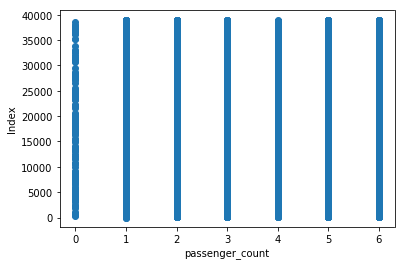

In [1080]:
plt.scatter(x=data.passenger_count,y=data.index)
plt.ylabel('Index')
plt.xlabel('passenger_count')
plt.show()

In [1081]:
data['passenger_count'][data.passenger_count==0].count()

130

In [1082]:
print(data.shape)
data.drop(data[data.passenger_count==0].index,axis=0,inplace=True)
print(data.shape)

(38109, 7)
(37979, 7)


Now,let's drop Outliers

In [1083]:
print(data.shape)
data.drop(data[data.passenger_count>8].index,axis=0,inplace=True)
print(data.shape)
data.to_csv('E:/copy22.csv')

(37979, 7)
(37979, 7)


Cleaning done...

**Type conversion (data formating) :
pickup_datetime **

In [1084]:

data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

observed type of column pickup_datetime is an object . will convert it to datetime format

In [1085]:
data['pickup_datetime'].head(1)

0    2009-06-15 17:26:21 UTC
Name: pickup_datetime, dtype: object

Problem faced: to_datetime - too slow

In [1086]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'], infer_datetime_format=True)

In [1087]:
data['pickup_datetime'].head(1)

0   2009-06-15 17:26:21
Name: pickup_datetime, dtype: datetime64[ns]


split the datetime

In [1088]:
data['year'] = data['pickup_datetime'].dt.year
data['Month'] = data['pickup_datetime'].dt.month
data['Date'] = data['pickup_datetime'].dt.day
data['Day of Week'] = data['pickup_datetime'].dt.dayofweek
data['Hour'] = data['pickup_datetime'].dt.hour
data['Minute'] = data['pickup_datetime'].dt.minute

**Distance **

Calculate the distance based on longitude and latitude 

Haversine formula:

dlon = lon2 - lon1 
dlat = lat2 - lat1 
a = (sin(dlat/2))^2 + cos(lat1) * cos(lat2) * (sin(dlon/2))^2 
c = 2 * atan2( sqrt(a), sqrt(1-a) ) 
d = R * c (where R is the radius of the Earth)

#a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
#c = 2 ⋅ atan2( √a, √(1−a) )
#d = R ⋅ c

In [1089]:
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [1090]:
data['distance']=data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [1091]:
data["distance"].head(5)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: distance, dtype: float64

In [1092]:
#Analyze column distance ,and drop the rows if necessary to drop
data[data.distance==0].shape  # found records with 0 distnace 

(385, 14)

In [1093]:
print(data.shape)
data.drop(data[data.distance==0].index,axis=0, inplace=True) # drop the rows having records of distance as 0
print(data.shape)

(37979, 14)
(37594, 14)


**Exploratory Data Analysis**

**1)Check the pickup date and time affect the fare or not**

Text(0, 0.5, 'Fare')

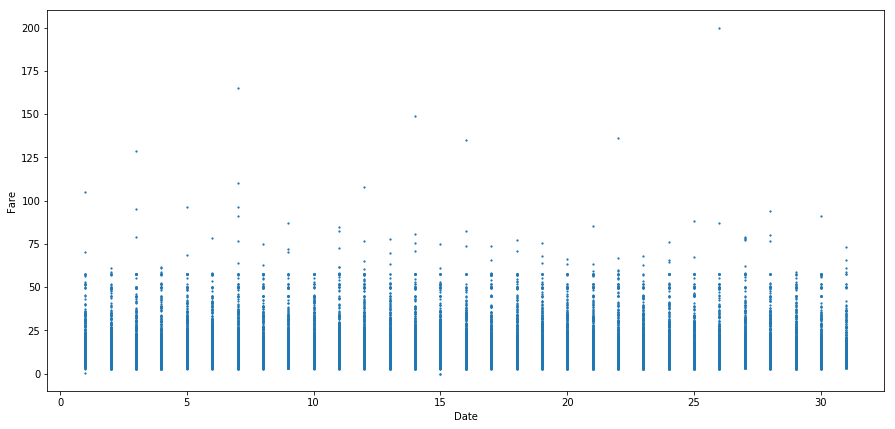

In [1094]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['Date'], y=data['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

The fares throught the month mostly seem uniform

Text(0, 0.5, 'Frequency')

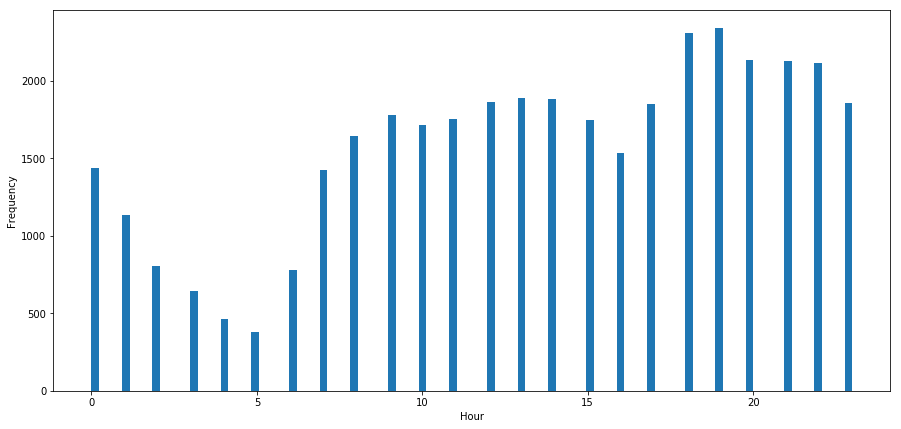

In [1095]:
plt.figure(figsize=(15,7))
plt.hist(data['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM 

Text(0, 0.5, 'Fare')

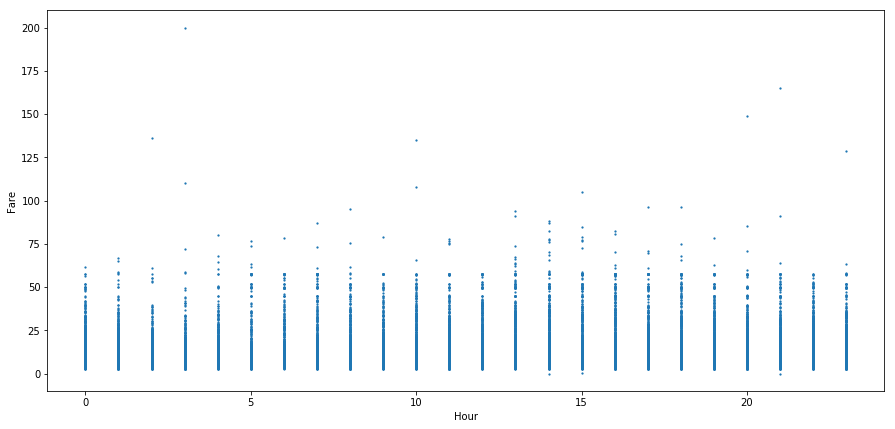

In [1096]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['Hour'], y=data['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

**2)number of passengers vs fare**

Text(0, 0.5, 'Frequency')

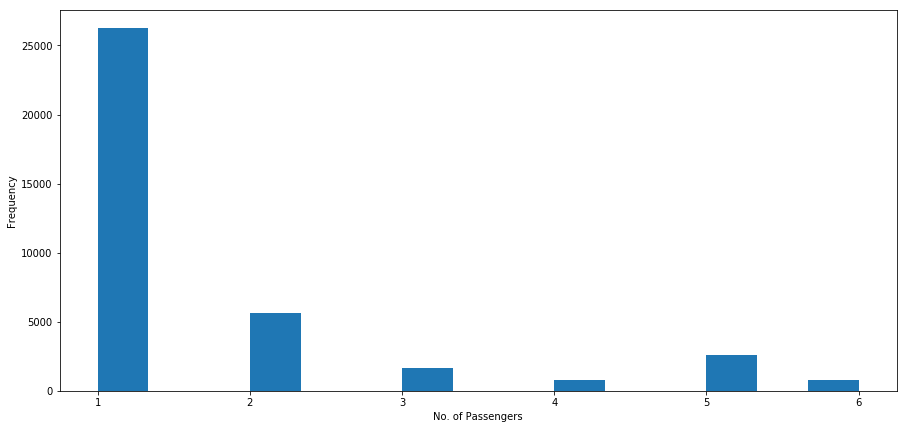

In [1097]:
plt.figure(figsize=(15,7))
plt.hist(data['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

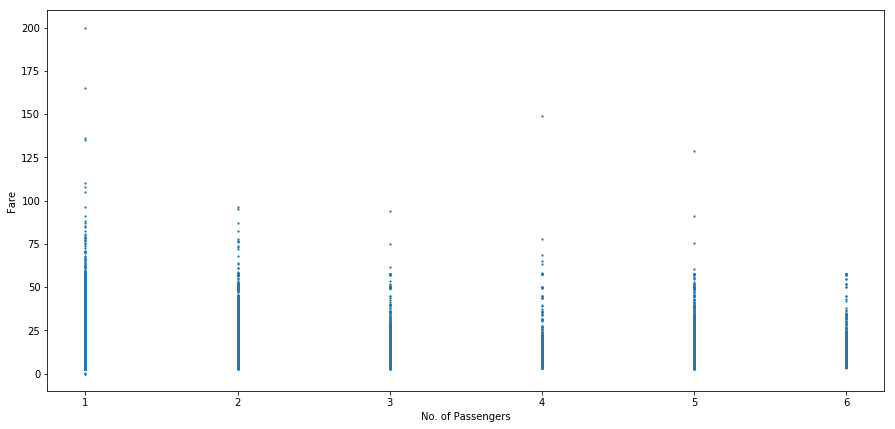

In [1098]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['passenger_count'], y=data['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

**3)Does the day of the week affect the fare?**

Text(0, 0.5, 'Frequency')

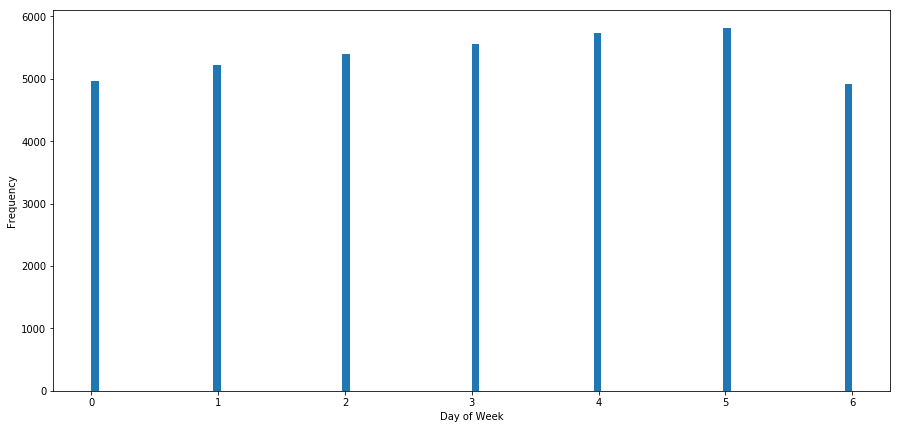

In [1099]:
plt.figure(figsize=(15,7))
plt.hist(data['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
#0 means Saturday

 day of the week doesn't seem to have the effect on the number of cab rides

**Test Data**

In [1100]:
test_data=pd.read_csv("D:/test1.csv")
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,08:24.0,2015-01-27 13:08:24 UTC,-73.983123,40.725289,-73.981430,40.743835,1
1,08:24.0,2015-01-27 13:08:24 UTC,-73.789804,40.645352,-73.998886,40.739201,1
2,12:12.0,2011-10-08 11:53:44 UTC,-73.138071,41.365669,-73.979654,40.746139,1
3,12:12.0,2012-12-01 21:12:12 UTC,-73.973311,40.750564,-73.990448,40.751635,1
4,12:12.0,2012-12-01 21:12:12 UTC,-73.874097,40.773698,-73.988565,40.744427,1


In [1101]:
test_data.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Convert key and pickup_datetime to correct format

In [1102]:
test_data['key']=pd.to_datetime(test_data['key'], infer_datetime_format=True)
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'], infer_datetime_format=True)

In [1103]:
test_data.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [1104]:
test_data['year'] = test_data['pickup_datetime'].dt.year
test_data['Month'] = test_data['pickup_datetime'].dt.month
test_data['Date'] = test_data['pickup_datetime'].dt.day
test_data['Day of Week'] = test_data['pickup_datetime'].dt.dayofweek
test_data['Hour'] = test_data['pickup_datetime'].dt.hour
test_data['Minute'] = test_data['pickup_datetime'].dt.minute

In [1105]:
test_data.head(3)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute
0,2019-10-05 08:24:00,2015-01-27 13:08:24,-73.983123,40.725289,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2019-10-05 08:24:00,2015-01-27 13:08:24,-73.789804,40.645352,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2019-10-05 12:12:00,2011-10-08 11:53:44,-73.138071,41.365669,-73.979654,40.746139,1,2011,10,8,5,11,53


In [1106]:
test_data.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day of Week          0
Hour                 0
Minute               0
dtype: int64

In [1107]:
from math import radians, cos, sin, asin, sqrt,atan2
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [1108]:
test_data['distance']=test_data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [1109]:
test_data['distance'].describe()

count    100.000000
mean      12.048783
std       17.924302
min        0.242378
25%        2.981561
50%        5.276836
75%       12.046766
max       98.615141
Name: distance, dtype: float64

In [1110]:
#test_data[test_data.distance==0]

In [1111]:
test_data.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'Month', 'Date', 'Day of Week', 'Hour', 'Minute', 'distance'],
      dtype='object')

**Machine Learning Algorithm**

Train data

In [1112]:

data.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
Minute                        int64
distance                    float64
dtype: object

In [1113]:
#drop pickup_datetime as we can't use directly in our model
print(data.shape)
data=data.drop('pickup_datetime',axis=1)
#data=data.drop('dropoff_latitude',axis=1)
#data=data.drop('dropoff_longitude',axis=1)
#data=data.drop('passenger_count',axis=1)
print(data.shape)

(37594, 14)
(37594, 13)


In [1114]:
data.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
Month                  int64
Date                   int64
Day of Week            int64
Hour                   int64
Minute                 int64
distance             float64
dtype: object

In [1115]:
data.iloc[:,:].head(1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day of Week,Hour,Minute,distance
0,4.5,-73.844311,40.721319,-73.84161,40.712278,1,2009,6,15,0,17,26,1.030764


In [1116]:
X=data.drop("fare_amount",axis=1)
y=data.iloc[:,0].values
print(y)

[ 4.5 16.9  5.7 ... 10.9 14.5  6. ]


In [1117]:
X.shape

(37594, 12)

In [1118]:
y.shape

(37594,)

#to check accuracy

In [1119]:
#from sklearn.model_selection import train_test_split
#train_X, val_X, train_y, val_y =train_test_split(X,y,test_size=0.2,random_state=0)

In [1120]:
#from sklearn.ensemble  import RandomForestRegressor
#Regression =RandomForestRegressor(random_state=0)
#Regression.fit(train_X,train_y)
#y_pred=Regression.predict(val_X)

In [1121]:
#import xgboost
#Regression_xgbooost =xgboost.XGBRegressor(n_estimator=201,max_depth=17,random_state=0)
#Regression_xgbooost.fit(train_X,train_y)
#y_pred=Regression_xgbooost.predict(val_X)

In [1122]:
#from sklearn.metrics import mean_absolute_error
#print(mean_absolute_error(val_y,y_pred))

test_data

In [1123]:
X_test=test_data
print(X_test.columns)
print(X_test.shape)
print(X_test.dtypes)

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'Month', 'Date', 'Day of Week', 'Hour', 'Minute', 'distance'],
      dtype='object')
(100, 14)
key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
Minute                        int64
distance                    float64
dtype: object


In [1124]:
X_test.drop(["key","pickup_datetime"],axis=1,inplace=True)

In [1125]:
print(X_test.shape)
print(X_test.dtypes)

(100, 12)
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
Month                  int64
Date                   int64
Day of Week            int64
Hour                   int64
Minute                 int64
distance             float64
dtype: object


In [1126]:
#from sklearn.ensemble  import RandomForestRegressor
#Regression =RandomForestRegressor(n_estimators=70,min_samples_leaf=5,random_state=0)
#Regression.fit(X,y)
#y_test_pred=Regression.predict(X_test)
#print(y_test_pred)

In [1127]:
import xgboost
Regression_xgbooost =xgboost.XGBRegressor(n_estimators=50,max_depth=15,max_leaves=9,random_state=0)
Regression_xgbooost.fit(X,y)
y_test_pred=Regression_xgbooost.predict(X_test)
print(y_test_pred)

[17:58:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[  9.322248   47.666405   92.411446    7.7836046  28.691135    6.38297
  10.972637    8.421568    9.001486   12.111347   19.002537   13.764061
  12.527177    4.2493153  12.488822   14.045624   35.822437    7.199153
  98.98218    35.889297   98.04152     8.806205   29.394186   15.861186
   6.197556   62.979927   27.327602   37.41457    16.629673   20.468666
 104.006584   12.594448   23.271204   45.632362    5.356991   15.520272
  17.041548   21.727274    6.065518   23.834188   11.041467   13.881654
  13.341151   39.395794   12.250406  104.006584    9.938264   19.291405
  28.993776   49.985153   28.083183   10.1582155  66.71111    24.888172
  22.491413   37.32848    35.308575   35.263523   48.81638     5.147921
  15.6113205  24.347647    8.801803   13.7204    102.01691    26.917463
  64.362045    4.1393614  12.404628   29.0623

**submission**

In [1128]:
submission = pd.read_csv('D:/sample_submission.csv')
submission['fare_amount'] = y_test_pred
submission.to_csv('D:/submission_K_39k_300_15_9n1.csv', index=False)
submission

,key,fare_amount
0,NaN,9.322248
1,NaN,47.666405
2,NaN,92.411446
3,NaN,7.783605
4,NaN,28.691135
5,NaN,6.382970
6,NaN,10.972637
7,NaN,8.421568
8,NaN,9.001486
9,NaN,12.111347


---------------------------

In [1129]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y =train_test_split(X,y,test_size=0.2,random_state=0)

In [1130]:
import xgboost
Regression_xgbooost =xgboost.XGBRegressor(n_estimators=300,max_depth=15,max_leaves=9,random_state=0)
Regression_xgbooost.fit(train_X,train_y)
y_pred=Regression_xgbooost.predict(val_X)

[17:58:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [1131]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y,y_pred))

1.8248990720268705
